### Importing all necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
import tensorflow
import keras

Using TensorFlow backend.


In [3]:
# Importing Cascade of Classifiers and Gaussian Filter
from skimage.feature import Cascade
from skimage import data
from skimage.filters import gaussian

In [4]:
from keras.preprocessing import image

In [5]:
from matplotlib import patches
from IPython.display import Image

### Reading and Visualizing the Image Data

In [6]:
image_path = "C:\\Users\\DELL\\Privacy Protection\\Bro.jpeg"

In [7]:
image = cv2.imread(image_path)
print(type(image))

<class 'numpy.ndarray'>


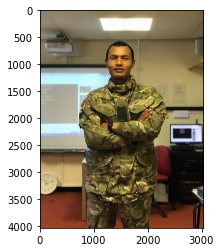

In [8]:
image_data= plt.imread(image_path)
plt.imshow(image_data)
plt.show()

### Detecting Faces with Scikit-Image

In [9]:
trained_file = data.lbp_frontal_face_cascade_filename()

In [10]:
detector = Cascade(trained_file)

In [11]:
# Detecting Faces
detected = detector.detect_multi_scale(img=image,
                                      scale_factor=1.2,
                                      step_ratio=1,
                                      min_size=(10, 10),
                                      max_size=(5000, 5000))

### Writing the necessary Functions

In [12]:
# Writing the GetFace Function
def getFace(d):
    """" Extracting the Face rectangle from the Image using the coordinates of the Detected. """
    
    # X and y starting points of the Face Rectangle
    X, y = d["r"], d["c"]
    
    # Height and Width of the Face Rectangle
    width, height = d["r"]+d["width"], d["c"]+d["height"]
    
    # Extract the Detected Face
    face = image[X:width, y:height]
    return face

In [13]:
# Writing the Showing the Detected Face Function
def show_detected_face(result, detected, title="Face Image"):
    plt.imshow(result)
    img_desc = plt.gca()
    plt.set_cmap("gray")
    plt.title(title)
    plt.axis("off")
    
    for patch in detected:
        img_desc.add_patch(
        patches.Rectangle(
        (patch["c"], patch["r"]),
        patch["width"],
        patch["height"],
        fill=False,
        color="r",
        linewidth=2))
    plt.show()

In [14]:
# Writing the Blurry Function
def mergeBlurryFace(original, gaussian_image):
    # X and y starting points of the Face Rectangle
    X, y = d["r"], d["c"]
    
    # Width and Height of the Face Rectangle
    width, height = d["r"]+d["width"], d["c"]+d["height"]
    
    original[X:width, y:height] = gaussian_image
    return original

In [15]:
# Writing the Visualization Function
def show_image(image, title="Image", cmap_type="gray"):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis("off")
    plt.show()

### Showing or Visualizing the Detected Face

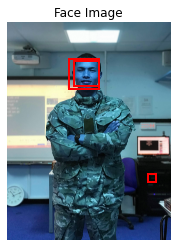

In [16]:
# Show the Detected Face
show_detected_face(image, detected)

### Privacy Protection on each Detected Face

In [17]:
# For each Detected Face
for d in detected:
    # Obtain the Face cropped from Detected Coordinates
    face = getFace(d)
    
    # Apply gaussian filter to Extracted Face
    gaussian_face = gaussian(face, multichannel=True, sigma=10)
    
    # Merge the Blurry Face
    resulting_image = mergeBlurryFace(image, gaussian_face)

### Showing the Final Image

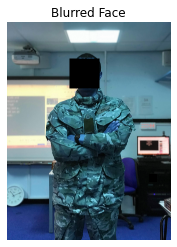

In [18]:
show_image(resulting_image, "Blurred Face")